# Brian2GeNN template
Checkout GeNN from git (counterintuitively, Python wheels of GeNN don't help you here!)

In [ ]:
!git clone --branch 4.8.0 https://github.com/genn-team/genn.git

Set the CUDA path so GeNN can find the version of CUDA installed on Colab and the GeNN path so Brian2GeNN can find GeNN (adding GeNN to the path **should** work but doesn't seem to on Colab)

In [3]:
%env CUDA_PATH=/usr/local/cuda
%env GENN_PATH=/content/genn

env: CUDA_PATH=/usr/local/cuda
env: GENN_PATH=/content/genn


Install Brian2GeNN. Note Brian2 2.5 doesn't seem to be compatible

In [2]:
!pip install "brian2<2.5"
!pip install brian2genn

Import everything from Brian2 and set the device to Brian2GeNN

In [4]:
from brian2 import *
import brian2genn

set_device('genn', directory='simple_example_synapses')

INFO       The following preferences have been changed for Brian2GeNN, reset them manually if you use a different device later in the same script: codegen.loop_invariant_optimisations, core.network.default_schedule [brian2.devices.genn]


As an example, run CUBA example

running brian code generation ...
building genn executable ...
['/content/genn/bin/genn-buildmodel.sh', '-i', '/content:/content/simple_example_synapses:/content/simple_example_synapses/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...


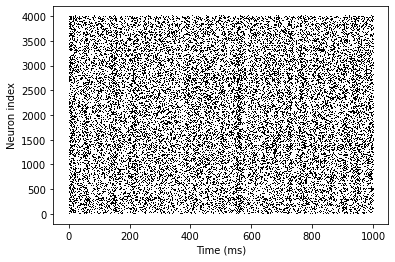

In [5]:
taum = 20.*ms
taue = 5.*ms
taui = 10.*ms
Vt = -50.*mV
Vr = -60.*mV
El = -49.*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,
                method='exact')
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0.*mV
P.gi = 0.*mV

we = (60.*0.27/10.)*mV # excitatory synaptic weight (voltage)
wi = (-20.*4.5/10.)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)

s_mon = SpikeMonitor(P)

run(1 * second)

plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()
